In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

sns.set_theme(style='whitegrid')
np.random.seed(42)

In [79]:
# loading a numpy-array containing the topological data
#z = np.load('topological_data.npy')[4650:4900, 800:1050]
z = np.load('topological_data.npy')[4800:4900, 800:900]

# --- Generating dataset
n = 100 # the square root of the number of datapoints
x, y = np.linspace(0,n,n), np.linspace(0, n, n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

z = z.ravel()

X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

In [90]:
X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)


pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=5),
    Ridge(alpha=10)
)

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=5)),
#     #('linearregressor', LinearRegression())
#     ('ridge', Ridge(alpha=100))
# ])

pipeline.fit(X_train, z_train)


# ss = StandardScaler() 
# ss.fit_transform(X)


z_total = pipeline.predict(X)

print(z_total)

x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))

z_orig_plot = z.reshape((n,n))

print(mean_squared_error(z, z_total))


fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis_r', edgecolor='none')
ax.set_title('Topological data')

# Plot the polynomial regression prediction (ideally a plane)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis_r', edgecolor='none')
ax.set_title('OLS Prediction')

plt.show()

params = pipeline.get_params()
print(params)

[2224.42557314 2229.52355583 2234.52122912 ... 1876.14760117 1891.50044081
 1908.14097035]
195.89689701641876


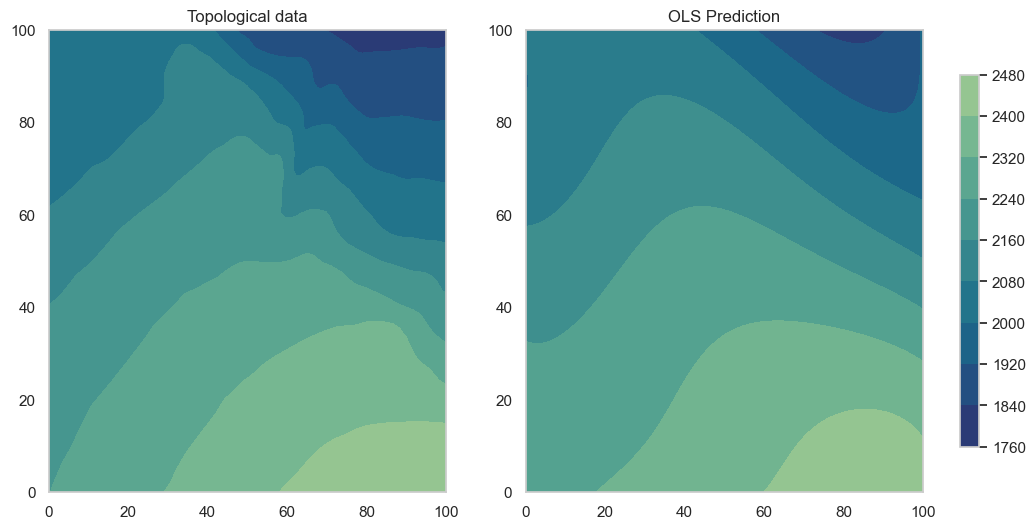

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the datapoints
original_data = axs[0].contourf(x_plot, y_plot, z_orig_plot, cmap='crest_r')
axs[0].set_title('Topological data')

# Plot the polynomial regression prediction
fitted_data = axs[1].contourf(x_plot, y_plot, z_plot, cmap='crest_r')
axs[1].set_title('OLS Prediction')


# Create the colorbar
contourf_objects = [original_data, fitted_data]
fig.colorbar(contourf_objects[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

plt.show()

Alpha: 0.0001, MSE: 0.0022314901335289375
Alpha: 0.000774263682681127, MSE: 0.002231490242898086
Alpha: 0.005994842503189409, MSE: 0.002231491096737158
Alpha: 0.046415888336127774, MSE: 0.0022314981290716923
Alpha: 0.3593813663804626, MSE: 0.002231577710407526
Alpha: 2.782559402207126, MSE: 0.002233643033212826
Alpha: 21.54434690031882, MSE: 0.002315224988006379
Alpha: 166.81005372000558, MSE: 0.003776294841768574
Alpha: 1291.5496650148827, MSE: 0.010651908357130598
Alpha: 10000.0, MSE: 0.029000024970084186


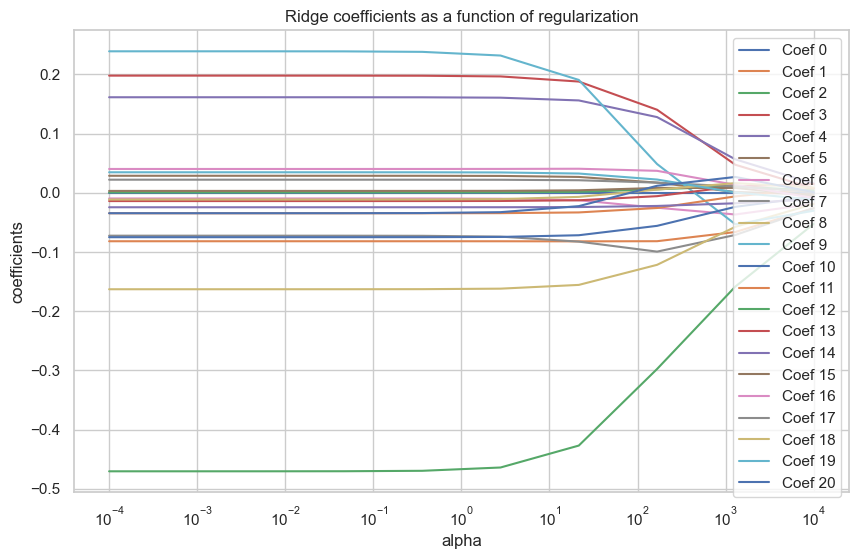

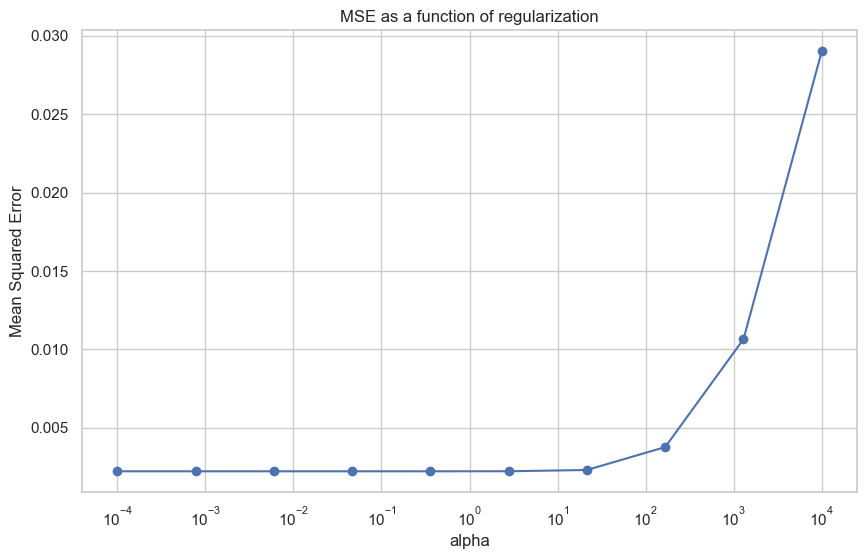

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the Franke Function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# Generate the data
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()
k = 0.01  # noise coefficient
z = FrankeFunction(x, y) + k * np.random.randn(n**2)  # target variable with standard normal noise
X = np.column_stack((x, y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5)),
    ('ridge', Ridge(alpha=0.1))  # Starting alpha
])

# Fit the pipeline
pipeline.fit(X_train, z_train)
z_total = pipeline.predict(X)

# Diagnostics: Explore a Wide Range of Alphas
alphas = np.logspace(-4, 4, 10)
coefs = []
mses = []

for alpha in alphas:
    pipeline.set_params(ridge__alpha=alpha)
    pipeline.fit(X_train, z_train)
    z_total = pipeline.predict(X_test)
    coefs.append(pipeline.named_steps['ridge'].coef_)
    mse = mean_squared_error(z_test, z_total)
    mses.append(mse)
    print(f"Alpha: {alpha}, MSE: {mse}")

# Plot Coefficients
plt.figure(figsize=(10, 6))
coefs = np.array(coefs)
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Coef {i}')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of regularization')
plt.axis('tight')
plt.legend()
plt.show()

# Plot MSEs
plt.figure(figsize=(10, 6))
plt.plot(alphas, mses, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE as a function of regularization')
plt.axis('tight')
plt.show()


In [77]:
X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)


pipeline = make_pipeline(
    StandardScaler(),
    #PolynomialFeatures(degree=5),
    #Ridge(alpha=1000)
)

print(X_train)

z = pipeline.fit_transform(X_train, z_train)

print(z)


[[91.91919192 52.52525253]
 [71.71717172 87.87878788]
 [35.35353535  0.        ]
 ...
 [59.5959596  98.98989899]
 [88.88888889 16.16161616]
 [94.94949495 59.5959596 ]]
[[ 1.42809633  0.09096179]
 [ 0.73746906  1.30142242]
 [-0.50566002 -1.70743685]
 ...
 [ 0.3230927   1.6818529 ]
 [ 1.32450224 -1.15408342]
 [ 1.53169042  0.33305392]]
